<a href="https://colab.research.google.com/github/wangqinNick/Deep-Learning-Tensorflow/blob/master/%E3%80%8CTutorial_03_%C2%BB_Linear_Classifiers_and_Logistic_Regression_%C2%BB_CS3244_Machine_Learning%E3%80%8D%E7%9A%84%E5%89%AF%E6%9C%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Available at http://www.comp.nus.edu.sg/~cs3244/AY2122S1/03.tutorial-colab.html

![Machine Learning](https://www.comp.nus.edu.sg/~cs3244/AY2122S1/header.png)

_Welcome to the Tutorial 03 Python notebook._ This week we will learn about classification algorithms.  We learn about **Linear Classifiers** and **Logistic Regression** and will be reviewing this material in the third tutorial.


In this notebook, we will go through different programming exercise and _mathematical proofs_. In the tutorial, the programming exercises involve using Logistic Regression from SciKit Learn (a cornerstone traditional ML toolkit, or `sklearn`).

## 1 Linear Classifiers



From its name we understand that it classifies items using a line, or more generally for $k$ dimensional data, a hyperplane with $k-1$ dimensions. In simpler terms, if we have data corresponding to two or more classes, the linear classifier puts a straight, boundary line between them to differentiate the classes from each other.

Let's examine the diagram below.  This is a two-class problem as we can see there are two types of data points in the diagram, white circles and black circles; i.e., $y \in \{black,white\}$.  So we want to build a classifier (put a boundary line) between these two classes. We can see three straight lines, $H_1, H_2, H_3$ dividing the data points different way. From these three, $H_1$ & $H_2$ both classifies the data points correctly, but $H_3$ does not. These are our linear classifiers. In this week, we will learn how to draw such straight lines to maximize the accuracy of our classification on our data points $X$.
<div align="center">
<img src="https://upload.wikimedia.org/wikipedia/commons/2/20/Svm_separating_hyperplanes.png" width=300 />
 </div>
 
 _By Cyc [CC BY 2.0](https://creativecommons.org/licenses/by/2.0), via Wikimedia Commons._


**Your Turn (Question 1):** Which of the three lines, classifies the data points accurately?

Choose from: $H_1$, $H_2$, $H_3$

**Your Turn (Question 2)**: Which machine learning paradiam does logistic regression belongs to?

Choose from: _Supervised Learning,Unsupervised Learning, Reinforcement Learning, None of the above_

**Supervised Learning**

**Your Turn (Question 3)**:Which of the following function is not linear separable?


$x_1$ | $x_2$ | AND gate output | OR gate output | NOR gate output | XOR gate output
:---:|:---:|:---:|:---:|:---:|:---:
1|1|1|1|-1|-1
1|-1|-1|1|-1|1
-1|1|-1|1|-1|1
-1|-1|-1|-1|1|-1


Choose from: _AND gate, OR gate, NOR gate, XOR gate_

**AND， XOR**


**Your Turn (Question 4)**: Which of the following methods do we use to best fit the data in Logistic Regression?

_Choose from: Maximum Likelihood, Least Square Error, Jaccard distance, None of the above_

**None of the above**

## 2 Programming : Logistic Regression from Sklearn

Let's do some simple hands-on exercise on _Logistic regression_.  We'll use the full version of the logistic regression that we would like you execute. 

We'll again use a dataset from the popular [UCI dataset repository](https://archive.ics.uci.edu/ml/index.php); in particular, the [Iris](https://archive.ics.uci.edu/ml/datasets/iris) dataset. This is perhaps the best known database to be found in the pattern recognition literature.  The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. 

We'll load in the data, take a look around and train a logistic regression classifier on it using `sklearn`. 

Feel free to look at other features and change the _hyperparameter_ values – the code is provided to you for your studying and experimentation.


### .a Load the Iris dataset

In [130]:
# Do some standard library imports for data science and machine learning
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn import datasets
import pandas as pd
from sklearn.linear_model import LogisticRegression

Since Iris is a built-in dataset in `sklearn`, we can load it directly with a single line of code. 

In [131]:
iris = datasets.load_iris() # Load the Iris dataset from sklearn

By running the following code, we see what the dataset looks like.  Again, this is generally good practice, to know something about the semantics of the dataset.  The UCI repository has a file per dataset it hosts to describe the data.  In this case, you can read up on what the fields' values mean [here](https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.names). 

In [132]:
# Manufacture a dataframe for the raw data for sample inspection
iris_pd = pd.DataFrame(data= np.c_[iris['data'], iris['target']], columns= iris['feature_names'] + ['target'])
iris_pd.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


We can also take a look at some general statistics.

In [133]:
iris_pd.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


To simplify things, we take just the first two feature columns. Also, just to simplify things, we'll force the two non-linearly separable classes to be labeled with the same category, ending up with a binary classification problem.

In [134]:
# Take the first two columns to populate a binary classification problem
X = iris.data[:, :2]
# Collapse the other two non-zero class irises as one class
y = (iris.target != 0) * 1 

### .b Visualize the Data

Now each data point is a 2-dimensional vector, so we can easily visualize it by drawing a figure using the `plt` _matplotlib_ object.  

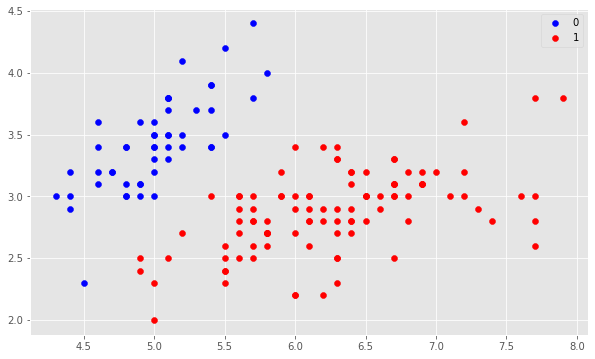

In [135]:
# Produce a scatterplot for the values
plt.figure(figsize=(10, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='b', label='0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='r', label='1')
plt.legend()
plt.show()

### .c Applying Logistic Regression for Classification

Now we could use the above dataset as training data, to train a logistic regression model on it using `sklearn`. To train a model in `sklearn` is simple and easy: you just need to call the `fit` function. 

In [136]:
# Create an instance of Logistic Regression classifier
model = LogisticRegression(C=1e20, solver = 'liblinear')
# Train the model
model.fit(X, y)

LogisticRegression(C=1e+20, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

Now, the trained model is stored in the variable `model`, we can print out the learned weights, and see the classification accuracy on the training data. 

In [137]:
print('The learned weights are {} {}'.format(model.intercept_, model.coef_)) 
# Your turn (to think about): Can you figure out what the outputs here mean?

preds = model.predict(X) # Predict on our training set.  
# Your turn (to think about): Is this indicative of testing performance?
print('The classification accuracy: {}'.format(((preds == y).mean())))

The learned weights are [-80.54201957] [[ 31.5951929  -28.30153825]]
The classification accuracy: 1.0


### .d Visualize the Decision Boundary

See? The classification accuracy is 100%, perfect! The model successfully finds a decision boundary that separates the two classes. Of course, this is based on the premise that the dataset is linearly separable. We can also superimpose the decision boundary on our earlier plot, using the following code:  

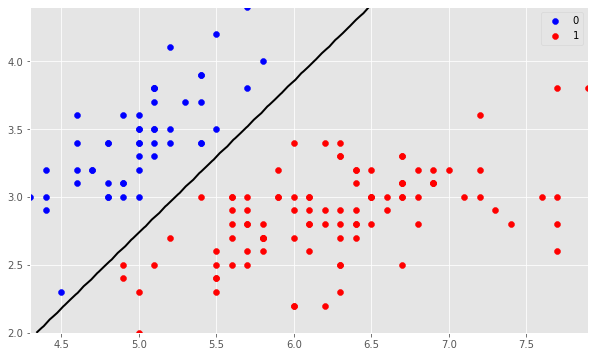

In [138]:
# First four lines are identical to the earlier cell
plt.figure(figsize=(10, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='b', label='0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='r', label='1')
plt.legend()

# Set up the Logistic Regressions threshold for plotting 
# You can try changing this too, or give more than one value
colors = ['black']
confidence = [0.5] 

# Define parameters for plotting the LR boundary
x1_min, x1_max = X[:,0].min(), X[:,0].max(),
x2_min, x2_max = X[:,1].min(), X[:,1].max(),
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
grid = np.c_[xx1.ravel(), xx2.ravel()]
probs = model.predict_proba(grid)[:, 1].reshape(xx1.shape)

# Plot the contour and show the plot
plt.contour(xx1, xx2, probs, confidence, linewidths=2, colors=['black'])
plt.show()

Congrats, you have successfully trained a logistic regression classifier on the *Iris* dataset!  

And whew!  You've completed a rather long Pre-tutorial notebook!  You (almost) deserve that shiny achievement...



## 3 Non-Linear Transformations
We have seen examples of using linear classifiers on different datasets. But the data we worked on up to now were largely linearly separable, i.e. we can draw a hyperplane to cleanly dinstinguish between the two sets. But in real life that is not the case. Most of the data we find in real life may not be linearly separable. We can not distinguish between two class just by drawing a straight line. Now, what should we do in such case? Is there a way to apply **Linear Classfiers** on **Linearly Non-Separable Data**?

The solution to this problem is simple: apply a **Non-Linear Transformation**. If we want to apply linear classifier on non-linear data points, then we can perform a non-linear transformation to those data points, so that they become linearly separable. In the figure below, we can see an example of non-linear data. We can see the data points of two classes are not separable by a straight line; but it looks like a circular boundary could divide them into two separate clusters.

So what do we need to do is tranform the data points!

<div align="center">
<img src="https://www.comp.nus.edu.sg/~neamul/Images/nonlinear_new1.png" width=700 />
 </div>



### .a Example of Non-linear Transformation

Now, there are a lot of ways to transform data points from one space to another. Depending on the original data points, we decide which transformation function we should use. In this example, taking the squares of each dimension: i.e., 
$(x_1,x_2,...,x_n) \xrightarrow\phi (x_1^2,x_2^2,...,x_n^2)$ works to manufacture a new dataset $Z$ that is linearly separable. We are not limited to just squaring though -- Instead of squaring, we can think of any transformation $\textbf{x} \xrightarrow\phi \textbf{z}$, where the transformation results in a linearly separable space between both clusters. Once we have transformed the data points to a different space, then we can apply our linear model to classify the data points.

<div align="center">
<img src="https://www.comp.nus.edu.sg/~neamul/Images/nonlinear_new2.png" width=800 />
 </div>

**Your Turn (Question 5)**: Transform this non-linear equation to a linear one: $y = ax^b$?

Y = lna + bX, where Y = lny, X = lnx

## 4 Programming : Implementing Logistic Regression


In this exercise, we are going to implement logistic regression from scratch. Logistic regression is a generalized linear model for classification that predicts the probability of a binary event. For example, we might use logistic regression to predict whether someone will be denied or approved for a loan, or whether an email is a spam or not.

Similar to linear regression, in logistic regression, input values ($\mathbf{X}$) are combined linearly using weights or coefficient values to predict an output value ($\mathbf{y}$). A key difference from linear regression is that the output value being modeled is a binary value ($0$ or $1$), rather than a numeric value.

In logistic regression, we’re essentially trying to find the weights that **maximize the likelihood of the training data** $\mathbf{X}$ and use them to categorize the target variable. Unlike linear regression, the likelihood maximization in logistic regression doesn’t have a closed form solution, and we'll need to solve the optimization problem with **gradient descent**. 

In [139]:
# Do some standard library imports for data science and machine learning
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn import datasets
import pandas as pd
from sklearn.linear_model import LogisticRegression

### a. Logistic Function



Before we dive into logistic regression, let’s take a look at the **logistic function** (or equivalently, sigmoid function), the heart of the logistic regression technique.  The logistic function is defined as:

$$
g(z) = \frac{1}{1 + \exp^{-z}}
$$

It is a "S"-shaped curve that maps any real value to the range between $0$ and $1$:

<div align="center">
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/88/Logistic-curve.svg/600px-Logistic-curve.svg.png" width=400 />
 </div>
 
 By Qef (The Standard Logistic Regression) [CC BY 4.0](https://creativecommons.org/licenses/by-sa/4.0/deed.en), via Wikimedia Commons._


Let's get started.  

**Your Turn (Question 6):** Implement the `sigmoid` function below.

_Copy the code you added or modified in the assessment_

In [140]:
def sigmoid(z):
    """Calculate the sigmoid function on an input

    Args:
        input (float): The input value to transform

    Returns:
        float: Transformed value for the input; bounded between 0.0 and 1.0
    """

    #############################################################
    #
    return 1 / (1 + np.exp(-z))
    #
    #############################################################

You can run the following code to plot the figure of your sigmoid function, and check if your implementation is correct. 

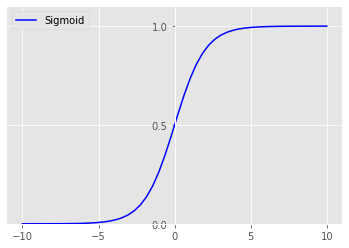

In [141]:
## Plotting testing harness
%matplotlib inline

# set the input space and define the function to plot
x = np.linspace(-10, 10)
y = sigmoid(x)

fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111)

# stylize the plot
plt.style.use('ggplot')
plt.xlim(-11,11)
plt.ylim(0,1.1)

ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.set_xticks([-10,-5,0,5,10])

ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))
ax.set_yticks([0,0.5,1])
 
# perform and show the plot
plt.plot(x,y,label="Sigmoid",color = "blue")
plt.legend()
plt.show()

### .b Prediction Function



In linear regression, for a data point $x$, we predict its value $y$ by using a linear function $y = h_{\theta}(x) = \theta^\top x$. This is not a great solution for predicting binary-valued labels ($y\in \{0,1\}$). In logistic regression, we first use a linear function $z = h_{\theta}(x) = \theta^\top x$ to get the "score" of $x$ belonging to the $1$ class, and then squash the score $z$ into the range $(0,1)$ using the sigmoid function,  i.e., $y = \text{sigmoid}(z)$. In this way, we can interpret the prediction $y$ as the probability that $x$ belongs to the $1$ class. 

In summary, the prediction function of logistic regression is as follows:

$$
P(y = 1 | x) = h_{\theta}(x) = \text{sigmoid}(\theta^\top x) \\
P(y = 0 | x) = 1 - P(y = 1 | x) = 1 - h_{\theta}(x)
$$



Now, implement the prediction function of logistic regression by yourself. The function takes as input the input matrix $\mathbf{X}$ and the parameter vector $\theta$, and returns $h_{\theta}(\mathbf{X})$. 

Inputs:
- `theta`: the weight vector $\theta$ (an $n$-dimensional vector).
- `X`: an $m \times n$ matrix, where the $j$-th row is the $j$-th data point $x^{(j)}$. 

Returns: $h_{\theta}(\mathbf{X})$: A numpy array where the $j$-th entry is $h_{\theta}(x^{(j)})$. 



**Your Turn (Question 7):** Implement the `prediction` function of logistic regression.

_Copy the code you added or modified in the assessment_

In [142]:
def prediction(theta, X):
    """Equivalent .predict() function in sklearn's classifier

    Args:
        theta (array of floats; n): The weight vector of our classifier
        X (array of floats; m x n): The sample we want to test or make a prediction on

    Returns:
        array of floats; m: Prediction for the test_sample
    """
    predictions = np.zeros(X.shape[0], np.float)
    #############################################################
    #
    predictions = sigmoid(np.matmul(X, theta))
    #
    #############################################################
    
    return predictions

### .c Calculating the Log-Likelihood



After we build up the logistic regression model, our goal is to search for a value of $\theta$ so that the probability $P(y = 1 | x) = h_{\theta}(x)$ is large when $x$ belongs to the $1$ class, and small when $x$ belongs to the $0$ class (since this is a binary classification task, this implies that $P(y = 0 | x)$ is large). We will learn $\theta$ from the training data. 

For a set of training examples with binary labels $\{(x^{(i)}, y^{(i)}) : i = 1, \cdots , m \}$, the log-likelihood of the training data measures how well our model fits the training data. The log-likelihood (denoted as $LL(\theta)$) is calculated as follows (refer to the course lecture notes to see its derivation):

$$
L(\theta) = - \frac{1}{m} \sum_i^m \left(y^{(i)} \log( h_\theta(x^{(i)}) ) + (1 - y^{(i)}) \log( 1 - h_\theta(x^{(i)}) ) \right).
$$

Note that only one of the two terms in the summation is non-zero, for each training example – depending on whether the label $y^{(i)}$ is $0$ or $1$. When $y^{(i)}=1$, minimizing the cost function implies that we need to make $h_{\theta}(x^{(i)})$ large; and when $y^{(i)}=0$, we want to make $1−h_{\theta}$ large, as explained above. 







Let's now implement this cost function. 

Inputs:
- `X`: an $m \times n$ matrix, where the $j$-th row is the feature vector of $x^{(j)}$. 
- `y`: a $m$-dimensional vector, where the $j$-th element is $y^{(j)}$. 
- `theta`: the weight vector $\theta$ (a $n$-dimentional vector). 

Returns: $L(\theta)$: A scalar. 

**Your Turn (Question 8):** Implement the `log_likelihood` function:

_Copy the code you added or modified in the assessment_

In [143]:
def log_likelihood(X, y, theta):
    """Calculates the log likelihood on the given data 

    Args:
        X (array of floats; m x n): The input data
        y (array of floats; m): The target values for the data
        theta (array of floats; n): The weight vector \theta

    Returns:
        float: cost, the log likelihood of the data X
    """
    likelihood = 0.0
    # y :(150, 0)
    #############################################################
    #
    # res = [(np.matmul(y[i], np.log(prediction(theta, X[i]))) + (1 - y[i]) * np.log(1 - prediction(theta, X[i])))) for i in range(len(X))]
    for i in range(len(X)):
        likelihood += y[i] * np.log(prediction(theta, X[i]))
        likelihood += (1 - y[i]) * np.log(1 - prediction(theta, X[i]))
    likelihood = -likelihood / len(X)
    #
    #############################################################
    
    return likelihood

### .d Calculating the Gradient



We now have a cost function that measures how well a given hypothesis $h_{\theta}$ fits our training data. We can learn to classify our training data by minimizing $L(\theta)$ to find the best choice of $\theta$. 

Here we use the gradient descent to optimize $L(\theta)$. So we need to provide a function that computes the gradients of our cost function $L(\theta)$. We'll denote this as $\nabla_\theta L(\theta)$ for any requested choice of $\theta$.  

The detailed derivation of $\nabla_\theta L(\theta)$ is given later below in the post-class section of this notebook. For now, we simply write the answer as follows:

$$
\nabla_\theta L(\theta) = \frac{1}{m} X^\top (h_{\theta}(X) - y)
$$

$\nabla_\theta L(\theta)$ is the gradient and should be an $n$-dimensional vector, where the $i$-th element of $\nabla_\theta L(\theta)$ is the partial derivative of the loss function $L(\theta)$ with respect to $\theta_i$. 



It's your turn again! Please write your own code in the following function to calculate the gradient $\nabla_\theta L(\theta)$, given:  
- `X`: an $m \times n$ matrix, where the $j$-th row is the feature vector of $x^{(j)}$. 
- `y`: a $m$-dimensional vector, where the $j$-th element is $y^{(j)}$. 
- `theta`: the weight vector $\theta$. (an $n$-dimensional vector)

Returns: $\nabla_\theta L(\theta)$ (an $n$-dimensional vector)

**Tip**: Please call the `prediction` function you implemented to calculate $h_{\theta}(X)$. 

**Your Turn (Question 9):** Implement the `gradient` function.

_Copy the code you added or modified in the assessment_

In [144]:
def gradient(X, y, theta):
    """Calculates the gradient 

    Args:
        X (array of floats; m x n): The input data
        y (array of floats; m): The target values for the data
        theta (array of floats; n): The weight vector \theta

    Returns:
        array of floats; n: the gradient of the cost function
    """
    gradient = 0.0
    
    #############################################################
    #
    m = len(X)
    res = np.matmul(np.transpose(X), prediction(theta, X) - y)
    gradient = res / m
    #
    #############################################################
    
    return gradient

### .e Building the Logistic Regression Function



Finally, we are ready to train the model using gradient descent. The following code provide you a training framework. 





The weight update rule in batch gradient descent is given by:
$$
\theta(t+1) = \theta(t) - \alpha \cdot \nabla_{\theta(t)} L(\theta(t))
$$
where $\theta(t)$ represents the weights in the $t$-th iteration, and $\alpha$ denotes the learning rate.  

In the following function, your task is to implement the weight update of batch gradient descent according to the above equation. Please call the `gradient` function to help you calculate the gradient in your code.

Inputs: 
- `X`: (np.array) an $m \times n$ matrix, where the $j$-th row is the feature vector of $x^{(j)}$. 
- `y`: (np.array) a $m$-dimensional vector, where the $j$-th element is $y^{(j)}$. 
- `num_steps`: (int) the number of training iterations. 
- `learning_rate`: (float) learning rate of gradient descent, \alpha. 
- `verbose`: (Boolean) should we print the training information or not?

Returns: the optimized weights $\theta$. 

**Your Turn (Question 10):** Complete the code to train the `logistic_regression` model.

_Copy the code you added or modified in the assessment_

In [145]:
def logistic_regression(X, y, num_steps, learning_rate, verbose):
    """Optimises the weights for logistic regression, given a training dataset.

    Args:
        X (array of floats; m x n): The input data
        y (array of floats; m): The target values for the data
        num_steps (int): number of training iteration before termination
        learning_rate (float): learning rate for the gradient descent
        verbose (Boolean): print log-likelihood statistics?

    Returns:
        array of floats; n: The weight vector \theta
    """
    # Add the bias
    bias = np.ones((X.shape[0], 1))
    X = np.concatenate((bias, X), axis=1)

    # Initialize the weights
    weights = np.zeros(X.shape[1])

    # Training with gradient descent
    for step in range(num_steps):

        # Update weights with gradient
        #############################################################
        #
        weights = weights - learning_rate * gradient(X, y, weights)
        
        #
        #############################################################

        # Print log-likelihood every step
        cost = log_likelihood(X, y, weights)
        if verbose and step % 10000 == 0:
            print('Number of iterations: {}; cost: {:.5f}'.format(step, cost))

    return weights

### .f Putting it into practice: Classification on the *Iris* dataset

Congratulations! You have implemented your own version of logistic regression. To see how well it works in practice, let's test it on a real-world dataset. 

We will again use the same, modified _Iris_ dataset as in our Pre-Class work. Please run the following code to load and visualize the data first.  

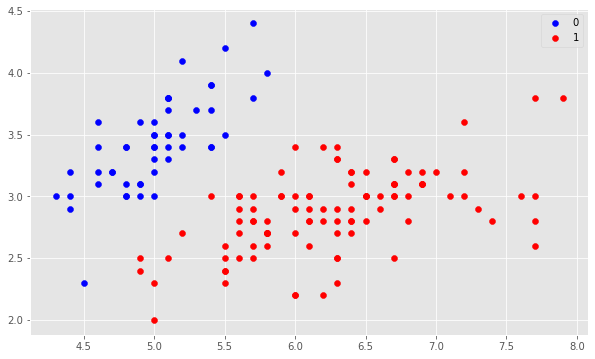

In [146]:
# Load the original dataset
iris = datasets.load_iris()

# Obtain the training data
X = iris.data[:, :2]
y = (iris.target != 0) * 1

# Visualize the training data
plt.figure(figsize=(10, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='b', label='0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='r', label='1')
plt.legend()
plt.show()

# Your turn: Sanity check -- verify the dataset is the same as in the earlier plot

### .g Binary Classification with Logistic Regression



Excited? It's time to run our model to do binary classification on our modified  _Iris_ dataset. 

The following code trains your implemented logistic regression model.  You should expect to see a continuing decrease of the cost function. The training process will typically takes 10–60 seconds in our experience, but your mileage may vary.

In [147]:
weights = logistic_regression(X, y, num_steps = 300000, learning_rate = 0.1, verbose = True)

Number of iterations: 0; cost: 0.61069
Number of iterations: 10000; cost: 0.03433
Number of iterations: 20000; cost: 0.02879
Number of iterations: 30000; cost: 0.02572
Number of iterations: 40000; cost: 0.02341
Number of iterations: 50000; cost: 0.02151
Number of iterations: 60000; cost: 0.01989
Number of iterations: 70000; cost: 0.01850
Number of iterations: 80000; cost: 0.01730
Number of iterations: 90000; cost: 0.01625
Number of iterations: 100000; cost: 0.01533
Number of iterations: 110000; cost: 0.01452
Number of iterations: 120000; cost: 0.01380
Number of iterations: 130000; cost: 0.01316
Number of iterations: 140000; cost: 0.01258
Number of iterations: 150000; cost: 0.01206
Number of iterations: 160000; cost: 0.01159
Number of iterations: 170000; cost: 0.01116
Number of iterations: 180000; cost: 0.01077
Number of iterations: 190000; cost: 0.01041
Number of iterations: 200000; cost: 0.01008
Number of iterations: 210000; cost: 0.00977
Number of iterations: 220000; cost: 0.00948
Nu

Let's inspect what we've done.  The following code prints the weights, classification accuracy, and plots the decision boundary.  

The learned weights are [-25.89066442  12.523156   -13.40150447]
The classification accuracy: 1.0


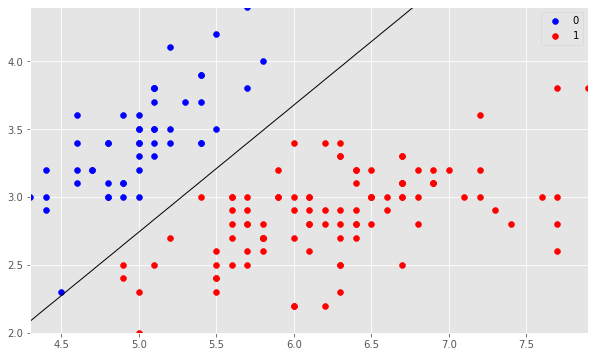

In [148]:
############################################################
def predict_prob(X, weights):
    """Returns prediction probabilities for the input data
    Args:
        X (array of floats; m x n): The input data
        weights (array of floats; n): The weight vector \theta

    Returns:
        array of floats; n: The predicted probability of +1 class, bounded (0,1)
    """
    # Add the bias, x_0, for each example
    bias = np.ones((X.shape[0], 1))
    X = np.concatenate((bias, X), axis=1)

    return sigmoid(np.dot(X, weights))
###########################################################

print('The learned weights are {}'.format(weights))

preds = predict_prob(X, weights).round()
# Calculate the accuracy
accu = (preds == y).mean() 
print('The classification accuracy: {}'.format(accu))

confidence = [0.5]
boundary_colors = ['black']

plt.figure(figsize=(10, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='b', label='0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='r', label='1')
plt.legend()
x1_min, x1_max = X[:,0].min(), X[:,0].max(),
x2_min, x2_max = X[:,1].min(), X[:,1].max(),
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
grid = np.c_[xx1.ravel(), xx2.ravel()]
probs = predict_prob(grid, weights).reshape(xx1.shape)
plt.contour(xx1, xx2, probs, confidence, linewidths=1, colors=boundary_colors)
plt.show()

If you got everything right, you are expected to obtain a perfect classification accuracy (e.g., 1.0), and plot a beautiful decision boundary to separate the data points correctly. 


### .h Compare your version with `sklearn`



Now compare your implementation with `sklearn`.  Print the training time, learned weights, and the classification accuracy. Do you find that there is a remarkably difference is about training time? `sklearn` is an order of magnitude faster. 



In [149]:
def test_sklearn_logistic_regression(X, y):
    """Testing harness for the sklearn logistic regression 
    Args:
        X (array of floats; m x n): The input data
        y (array of floats; m): The target values for the data
    """
    print('sklearn')
    model = LogisticRegression(C=1e20,solver = 'liblinear')
    %time model.fit(X, y)
    preds = model.predict(X)
    print('The learned weights are {} {}'.format(model.intercept_, model.coef_))
    print('The classification accuracy: {}'.format(((preds == y).mean())))
    print()
    return

def test_your_version_logistic_regression(X, y):
    """Testing harness for your version of logistic regression 
    Args:
        X (array of floats; m x n): The input data
        y (array of floats; m): The target values for the data
    """
    print('Your version')
    %time weights = logistic_regression(X, y, num_steps = 300000, learning_rate = 0.1, verbose = False)
    print('The learned weights are {}'.format(weights))
    preds = predict_prob(X, weights).round()
    print('The classification accuracy: {}'.format((preds == y).mean()))
    return
  
test_sklearn_logistic_regression(X, y)
test_your_version_logistic_regression(X, y)

sklearn
CPU times: user 3.65 ms, sys: 5 µs, total: 3.66 ms
Wall time: 2.77 ms
The learned weights are [-80.54201957] [[ 31.5951929  -28.30153825]]
The classification accuracy: 1.0

Your version
CPU times: user 17min 6s, sys: 4.7 s, total: 17min 11s
Wall time: 17min 7s
The learned weights are [-25.89066442  12.523156   -13.40150447]
The classification accuracy: 1.0


Great job!  We're done here!

For more understanding:
* Your turn (optional): Hey, you know, we tested on our training data (a no-no)!  Modify your code to use the `train_test_split` function to divide your dataset properly into a training and testing dataset, with 50% for training and 50% for testing.
* Your turn (optional): Change the reporting to visualize the decision boundary (0.5 or greater) at different iterations during training. You can even plot them with different shades of gray.
* Your turn (optional): Try out a linear regression problem.  You'll have to change your dataset from a classification one to one with real valued outputs (regression).  You'll need to write out your own linear regression trainer.  
  * You can try with the same gradient descent algorithm you used for logistic regression.
  * Or with the closed-form analytic solution (harder)

**Your Turn (Question 11)**: Not optional.  Describe how you would apply a logistic regression on a 3-class classification problem.

_Replace with your answer_

## 5 Derivation of the logistic regression gradient (Optional, covered in tutorial)



Here we derive the gradient of the cost function in logistic regression, i.e., $\nabla_{\theta} L(\theta)$, step by step. To recap, the cost function $L(\theta)$, is as follows:
$$
L(\theta) = - \frac{1}{m} \sum_i^m \left(y^{(i)} \log( h_\theta(x^{(i)}) ) + (1 - y^{(i)}) \log( 1 - h_\theta(x^{(i)}) ) \right).
$$

Before we calculate the gradient $\nabla_{\theta} L(\theta)$, we first calculate the gradient of the sigmoid function $g(z)$, which will be very useful in our derivation. The gradient of the sigmoid function $\nabla_{z} g(z)$ is as follows. 
$$
\nabla_{z} g(z) = \nabla_{z} \frac{1}{1 + \exp^{-z}} = \frac{\exp(z)}{(1 + \exp^{-z})^2} = \frac{1}{1 + \exp^{-z}} \cdot (1 - \frac{1}{1 + \exp^{-z}}) = g(z) (1 - g(z))
$$

So, we find that $\nabla_{z} g(z) = g(z) (1 - g(z))$. This is a very useful property of the sigmoid function, which will facilitate us a lot in the derivation of  $\nabla_{\theta} L(\theta)$. 

Now, we derivate the gradient $\nabla_{\theta} L(\theta)$ by calculating its $i$-th element, i.e., the gradient of $L(\theta)$ with respect to $\theta_i$, as follows:

(Note that $h_{\theta}(x^{(j)}) = g(\theta^{\top} x^{(j)})$)

$$
\begin{eqnarray*} 
\frac {\partial L(\theta)}{\partial \theta_i} &=&- \frac 1 m \sum_{j=1}^m y^{(j)} \frac{1}{g(\theta^{\top} x^{(j)})}g(\theta^{\top} x^{(j)})(1-g(\theta^{\top} x^{(j)}))x_i^{(j)}+(1-y^{(j)})\frac{-1}{1-g(\theta^{\top} x^{(j)})}g(\theta^{\top} x^{(j)})(1-g(\theta^{\top} x^{(j)}))x_i^{(j)} \\ 
&=& - \frac 1 m \sum_{j=1}^m y^{(j)}(1-g(\theta^{\top} x^{(j)}))x_i^{(j)}+(y^{(j)}-1)g(\theta^{\top} x^{(j)})x_i^{(j)} \\ 
&=& \frac 1 m \sum_{j=1}^m (g(\theta^{\top} x^{(j)}) - y^{(j)})x_i^{(j)} 
\end{eqnarray*}
$$

If we write the following equation in vectorized form, then it's a lot simpler.  We have:
$$
\frac {\partial L(\theta)}{\partial \theta_i} = \frac 1 m (g(\theta^{\top} \mathbf{X}) - y)^{\top} \mathbf{X}_{:i}
$$
where $\mathbf{X}_{:i}$ represents the $i$-th column of $\mathbf{X}$ (an $m$ dimensional column vector). Finally, based on the above equation, we could write $\nabla_{\theta} L(\theta)$ in the vectorized form, as follows:

$$
\begin{eqnarray*} 
\nabla_{\theta} L(\theta) & = & \frac 1 m \mathbf{X}^{\top} (g(\theta^{\top} \mathbf{x}) - y) \\
& = & \frac 1 m \mathbf{x}^{\top} (h_{\theta}(\mathbf{x}) - y)
\end{eqnarray*}
$$

---
# Credits


Authored by Theivendiram Pranavan, Yip Ji Keong, Alvin; Mohammad Neamul Kabir; [Liangming Pan](http://www.liangmingpan.com/), [Min-Yen Kan](http://www.comp.nus.edu.sg/~kanmy) and Liu Yingnan (2019, 2020, 2021), affiliated with [WING](http://wing.comp.nus.edu.sg), [NUS School of Computing](http://www.comp.nus.edu.sg) and [ALSET](http://www.nus.edu.sg/alset). Inspired in part by Andrew Ng's Coursera course and Yaser S. Abu-Mostafa's Caltech course.
Licensed as: [Creative Commons Attribution 4.0 International](https://creativecommons.org/licenses/by/4.0/ ) (CC BY 4.0).
Please retain and add to this credits cell if using this material as a whole or in part.   Credits for photos given in their captions.